In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing Libraries**

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Loading and Initial Exploration**

In [104]:
df = pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [106]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## **4. Data Cleaning and Preprocessing**


In [107]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [108]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [109]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].dtype


dtype('float64')

In [110]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('int')
df['SeniorCitizen'].dtype

dtype('int64')

In [111]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [112]:
print(df['Churn'].value_counts())


Churn
No     5174
Yes    1869
Name: count, dtype: int64


## 5. Exploratory Data Analysis (EDA)


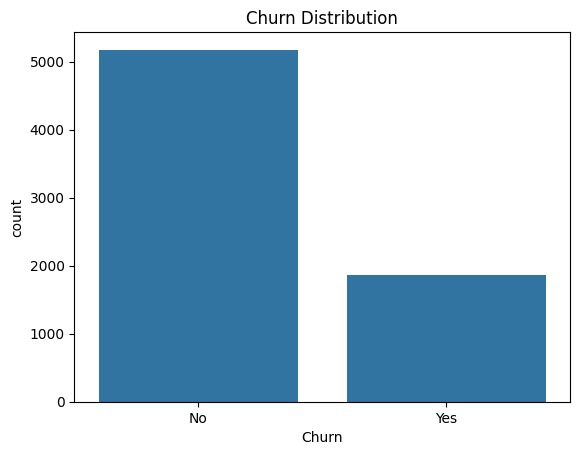

In [113]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


In [114]:
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True) * 100)


Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


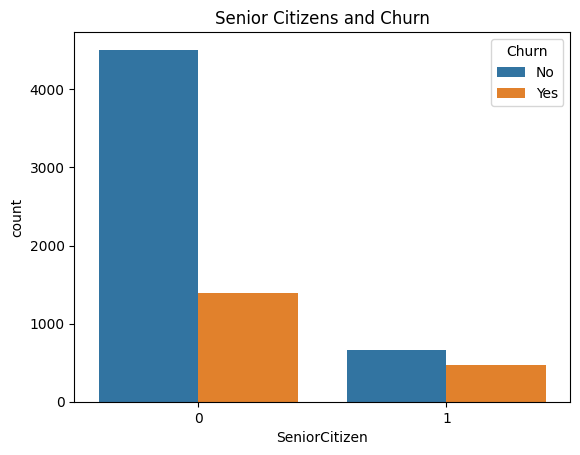

In [115]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title("Senior Citizens and Churn")
plt.show()


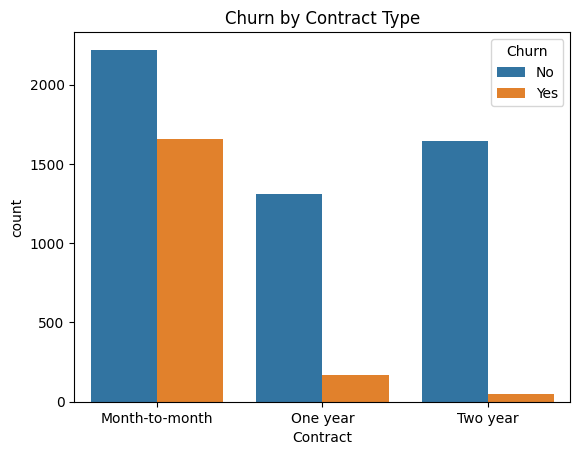

In [116]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()


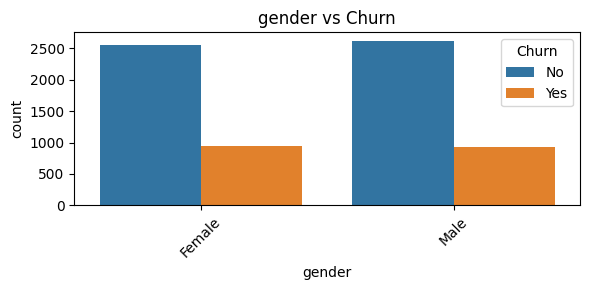

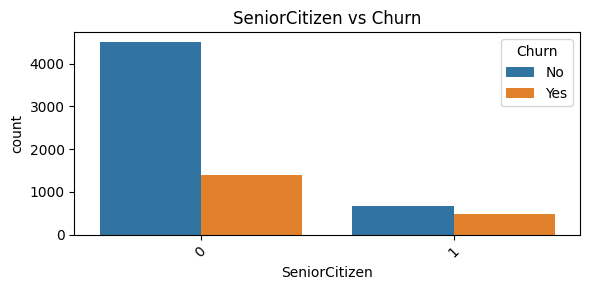

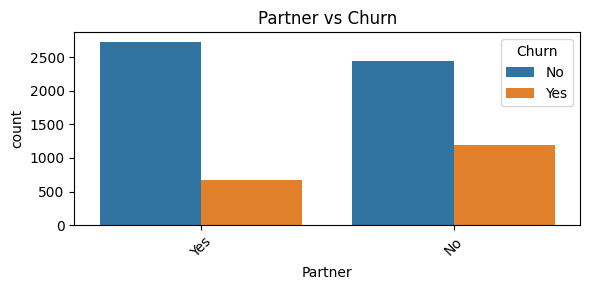

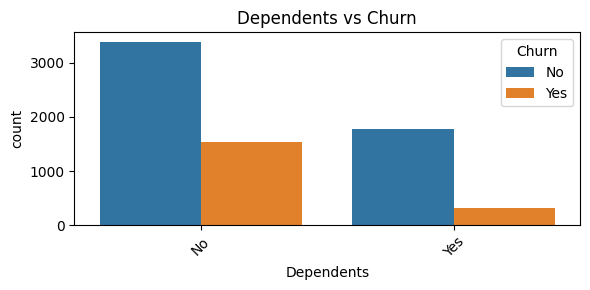

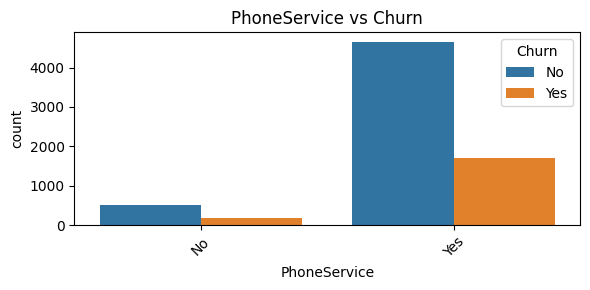

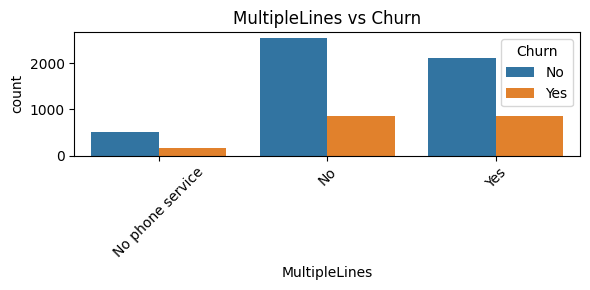

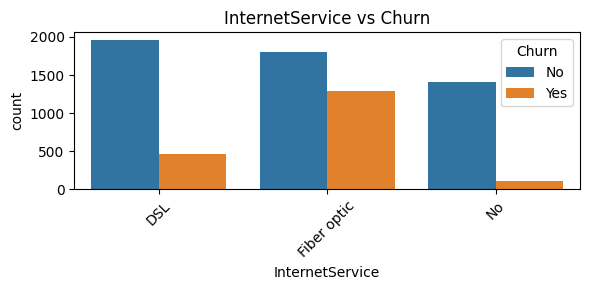

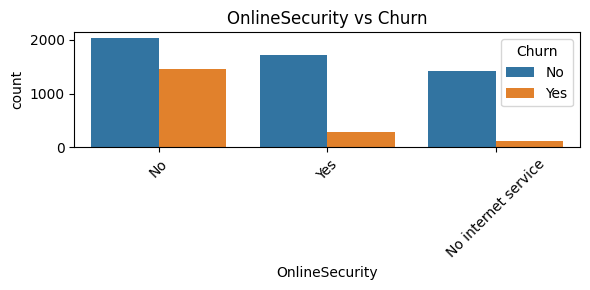

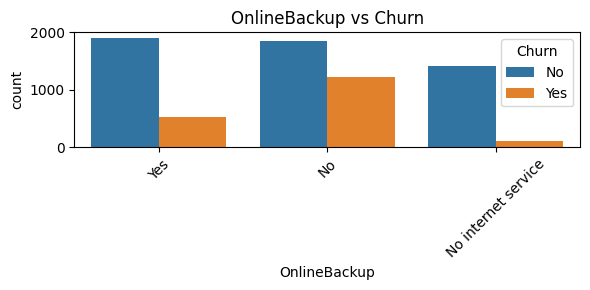

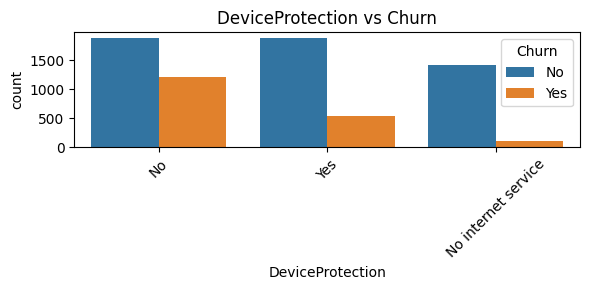

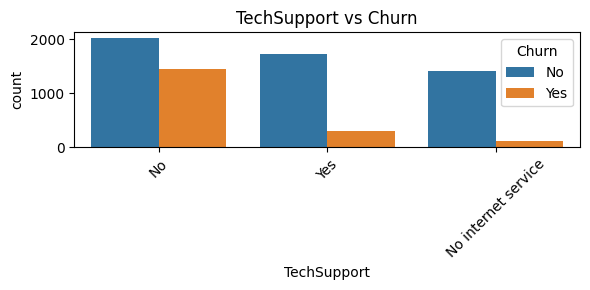

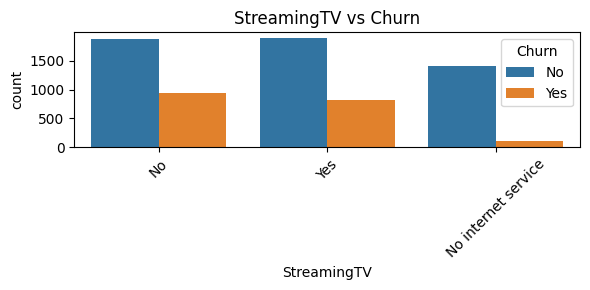

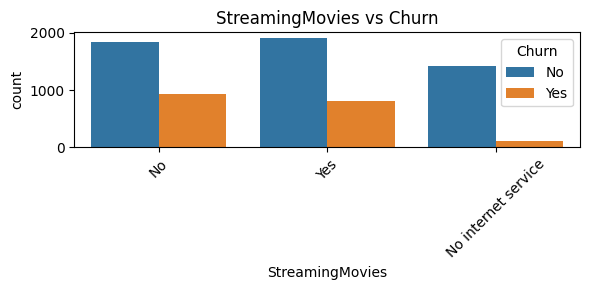

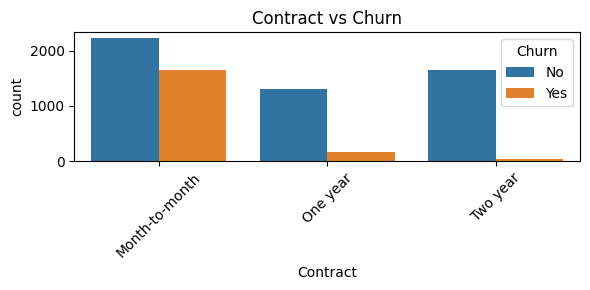

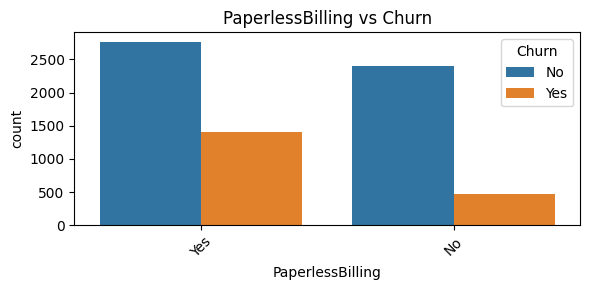

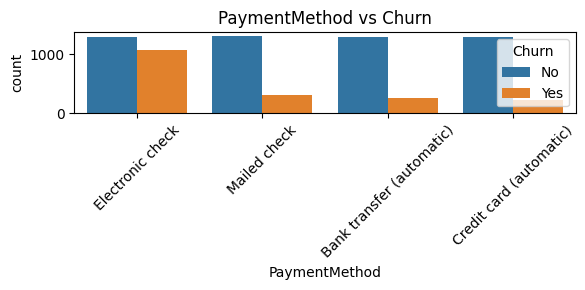

In [117]:

categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


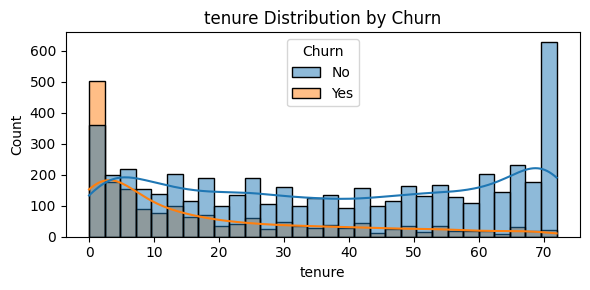

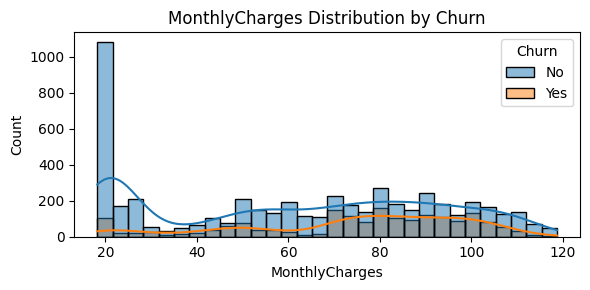

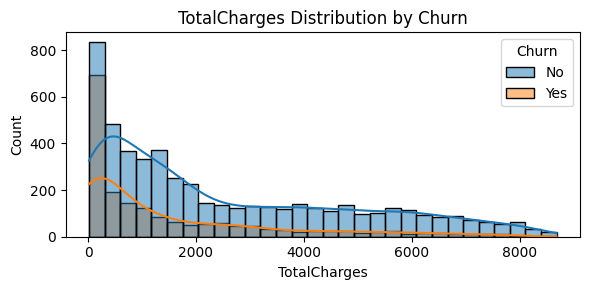

In [118]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, bins=30)
    plt.title(f'{col} Distribution by Churn')
    plt.tight_layout()
    plt.show()


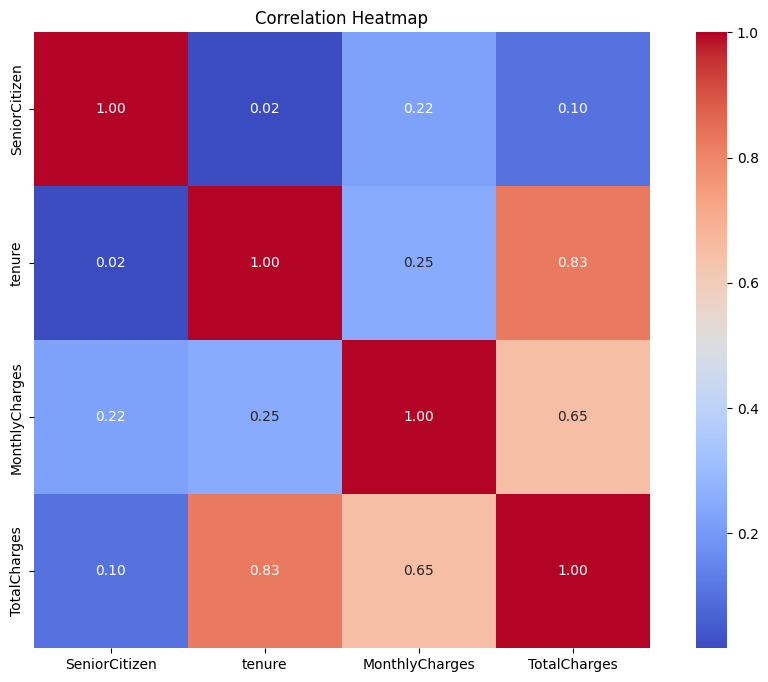

In [119]:
plt.figure(figsize=(12,8))

numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

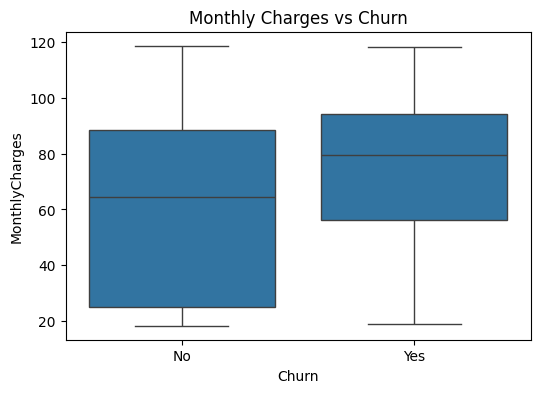

In [120]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

## 6. Feature Engineering



In [121]:

cat_cols = df.select_dtypes(include='object').columns.tolist()

print(cat_cols)


['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [122]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
binary_cols = [col for col in cat_cols if df[col].nunique() == 2]

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

multi_cat_cols = [col for col in cat_cols if df[col].nunique() > 2]

df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)


In [123]:
df.dtypes


,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
...,...
Contract_One year,bool
Contract_Two year,bool
PaymentMethod_Credit card (automatic),bool
PaymentMethod_Electronic check,bool


In [124]:
df.select_dtypes(include='object').columns


Index([], dtype='object')

In [125]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


## **7. Data Splitting (Train/Test)**


In [126]:
from sklearn.model_selection import train_test_split


X = df.drop(['Churn'], axis=1)
y = df['Churn']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


print(f"Train size: {X_train.shape}")
print(f"Test size: {X_test.shape}")

Train size: (5634, 7072)
Test size: (1409, 7072)


In [127]:
print(X_train.isnull().sum().sort_values(ascending=False).head(10))


TotalCharges             8
customerID_6645-MXQJT    0
customerID_6641-XRPSU    0
customerID_6637-KYRCV    0
customerID_6635-MYYYZ    0
customerID_6635-CPNUN    0
customerID_6633-SYEUS    0
customerID_6633-MPWBS    0
customerID_6631-HMANX    0
customerID_6630-UJZMY    0
dtype: int64


In [128]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

In [129]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (5626, 7072)
y_train shape: (5626,)
X_test shape: (1406, 7072)
y_test shape: (1406,)


step4

# **8. Model Building & Evaluation**


### 8.1.   Logistic Regression
Train a basic logistic regression model and evaluate it using precision, recall, F1-score, and confusion matrix.



In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=2000, random_state=42)
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)

print("Logistic Regression with Scaling:\n", classification_report(y_test, lr_preds))

Logistic Regression with Scaling:
               precision    recall  f1-score   support

           0       0.79      0.96      0.87      1032
           1       0.72      0.30      0.43       374

    accuracy                           0.78      1406
   macro avg       0.76      0.63      0.65      1406
weighted avg       0.77      0.78      0.75      1406



In [131]:
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1032
           1       0.67      0.43      0.53       374

    accuracy                           0.79      1406
   macro avg       0.75      0.68      0.70      1406
weighted avg       0.78      0.79      0.78      1406



### 8.2.   Random Forest Classifier

           Train a tree-based ensemble model and evaluate performance.




In [132]:
from sklearn.ensemble import RandomForestClassifier

# Create and train
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict
rf_preds = rf.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1032
           1       0.68      0.50      0.57       374

    accuracy                           0.80      1406
   macro avg       0.76      0.71      0.72      1406
weighted avg       0.79      0.80      0.79      1406



In [133]:
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1032
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1406
   macro avg       0.74      0.71      0.72      1406
weighted avg       0.79      0.80      0.79      1406



In [134]:
!pip install xgboost


### 8.3.       XGBoost Classifier
              Use boosting technique to potentially improve results on minority class.



In [135]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_preds))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:01:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.85      1032
           1       0.60      0.52      0.56       374

    accuracy                           0.78      1406
   macro avg       0.72      0.70      0.71      1406
weighted avg       0.77      0.78      0.78      1406



### **8.4.  Support Vector Machine (SVM)**
    Try a non-linear classifier and observe behavior (even if results are poor, it shows thoroughness).



In [136]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_preds = svm_model.predict(X_test_scaled)

print("SVM Classification Report:")
print(classification_report(y_test, svm_preds))


### 9. Model Comparison

      Compare the performance of all models using a DataFrame of key metrics (Accuracy, Precision, Recall, F1-score).



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_scores(y_true, y_pred, model_name):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

results = []
results.append(get_scores(y_test, lr_preds, 'Logistic Regression'))
results.append(get_scores(y_test, rf_preds, 'Random Forest'))
results.append(get_scores(y_test, xgb_preds, 'XGBoost'))
results.append(get_scores(y_test, svm_preds, 'SVM'))

import pandas as pd
comparison_df = pd.DataFrame(results)
print(comparison_df)


## Summary:

**After testing four models (Logistic Regression, Random Forest, XGBoost, and SVM), I observed that Random Forest achieved the highest F1 score, making it the most balanced choice for churn prediction. Logistic Regression offered interpretability, while XGBoost came close in performance. SVM underperformed, possibly due to class imbalance. The insights derived from feature importance can help the business target key drivers of churn, such as contract type, tenure, and service issues**

- Logistic Regression gave decent results but struggled with Recall (catching churners).
- Random Forest and XGBoost performed better in balancing Precision and Recall.
- SVM failed due to poor prediction capabilities on this data, probably due to scaling issues or linearity assumptions.
- Feature engineering played a major role in boosting model performance.


##** 11. Business Impact + Future Work**

- This model helps the business proactively **identify customers likely to churn**, allowing retention strategies like offers, support calls, or service upgrades.
- Improving Recall would ensure fewer churners go unnoticed — we can achieve this by:
  - Hyperparameter tuning
  - Trying SMOTE or other oversampling methods
  - Using ensemble methods or stacked models
- Deploying this as a real-time system (API + dashboard) can automate churn prediction across the customer base.
